Importing Libraries and reading data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

In [ ]:
data_train = pd.read_csv("train.csv")

data_train.shape

(14999, 9)

Cleaning and converting data to usable format

In [ ]:
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)

data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])

column_vidid=data_train['vidid']

   vidid  adview    views  likes  ...  comment  published  duration  category
0   5912      40  1031602   8523  ...     1095       2168       457         6
1   2741       2     1707     56  ...        6       2185       570         4
2   8138       1     2023     25  ...        2       2094       136         3
3   9005       6   620860    777  ...      153       2119       262         8
4    122       1      666      1  ...        0       2091        31         4

[5 rows x 9 columns]


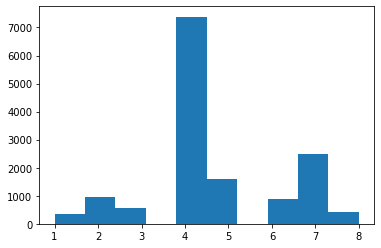

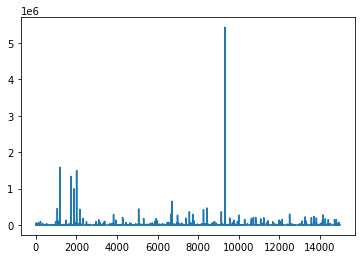

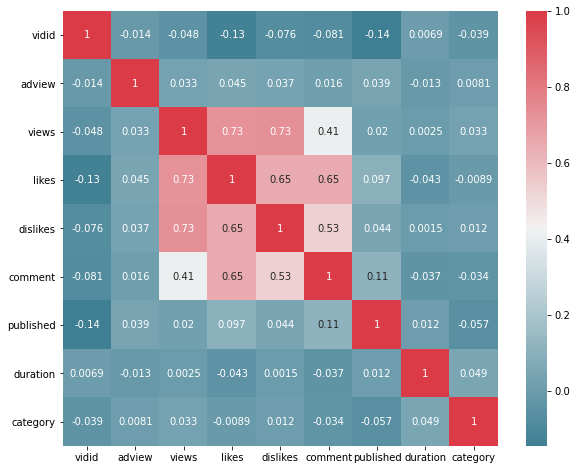

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = '' 
    mm = ''    
    P = ['H','M','S']    
    for i in y:        
        if i not in P:            
            mm+=i        
        else:            
            if(i=="H"):                
                h = mm                
                mm = ''            
            elif(i == "M"):                
                m = mm                
                mm = ''            
            else:                
                s = mm                
                mm = ''    
    if(h==''):        
        h = '00'    
    if(m == ''):        
        m = '00'    
    if(s==''):        
        s='00'    
    bp = h+':'+m+':'+s    
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time  = mp.apply(checki)

def func_sec(time_string):    
    h, m, s = time_string.split(':')    
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)
data_train["duration"]=time1

print(data_train.head())


plt.hist(data_train["category"])
plt.show()

plt.plot(data_train["adview"])
plt.show()


f, ax = plt.subplots(figsize= (10,8))
corr = data_train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=bool), cmap =sns.diverging_palette(220,10, as_cmap= True),square = True, ax = ax, annot = True)
plt.show()


Y_train  = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()


Splitting data in train and test data set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_train, Y_train, train_size=0.8, test_size=0.2 , random_state=42)

print(x_train.shape)

(11709, 7)


Normalizing data using min max normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print(x_train.mean())

0.17395410595763316


Using sklearn models and measuring errors to see which models fits the best

In [ ]:
from sklearn import metrics
def print_error(x_test,y_test,model_name):
    prediction = model_name.predict(x_test)
    print(prediction)
    print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))
    print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))
    print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))




from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
print_error(x_test,y_test,linear_regression)

from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(x_train,y_train)
print_error(x_test,y_test,supportvector_regressor)


from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
print_error(x_test,y_test, decision_tree)

from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(x_train,y_train)
print_error(x_test,y_test, random_forest)

[[-1208.12503703]
 [ 2843.47127678]
 [  541.17622097]
 ...
 [ 2122.37139874]
 [ 3005.65902961]
 [ 3652.44682139]]
Mean Absolute Error: 5288.059212091739
Mean Squared Error: 10881114821.641329
Root Mean Squared Error: 104312.58227865577


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2.92697591 1.56617865 1.80588619 ... 2.16984373 1.86337753 4.43711167]
Mean Absolute Error: 3478.040658670919
Mean Squared Error: 10901271708.174868
Root Mean Squared Error: 104409.15528905914
[22.  4.  1. ...  8.  1.  4.]
Mean Absolute Error: 5499.275614754099
Mean Squared Error: 12168836343.262636
Root Mean Squared Error: 110312.44872299154


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[ 23.53472635 661.06077348   6.48930988 ...  10.6790385  311.29573409
  90.64501891]
Mean Absolute Error: 5100.213584576651
Mean Squared Error: 10467119443.835915
Root Mean Squared Error: 102308.94117248949


Trying ANN on the data set

In [ ]:
import keras
from keras.layers import Dense

In [ ]:
ann = keras.models.Sequential([Dense(6, activation="relu",input_shape=x_train.shape[1:]),Dense(6,activation="relu"),Dense(1)])
optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_absolute_error
ann.compile(optimizer= optimizer, loss = loss, metrics=["mean_squared_error"])


In [ ]:
history = ann.fit(x_train,y_train,epochs=100)
ann.summary()
print_error(x_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 843us/step - loss: 1711.9769 - mean_squared_error: 767617024.0000
Epoch 2/100
366/366 [==============================] - 0s 870us/step - loss: 1711.5009 - mean_squared_error: 767612544.0000
Epoch 3/100
366/366 [==============================] - 0s 831us/step - loss: 1711.4910 - mean_squared_error: 767612288.0000
Epoch 4/100
366/366 [==============================] - 0s 850us/step - loss: 1711.4812 - mean_squared_error: 767612544.0000
Epoch 5/100
366/366 [==============================] - 0s 857us/step - loss: 1711.4648 - mean_squared_error: 767612736.0000
Epoch 6/100
366/366 [==============================] - 0s 856us/step - loss: 1711.4349 - mean_squared_error: 767612416.0000
Epoch 7/100
366/366 [==============================] - 0s 814us/step - loss: 1711.4150 - mean_squared_error: 767611968.0000
Epoch 8/100
366/366 [==============================] - 0s 917us/step - loss: 1711.3994 - mean_squared_error: 767611648.0000
Epoch 9/

In [ ]:
import joblib
joblib.dump(random_forest,"random_forestregressor_youtubeadview.pkl")

ann.save("ann_youtubeadview.h5")

Reading test data

In [ ]:
data_test = pd.read_csv("test.csv")

data_test.shape

(8764, 8)

In [ ]:
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)

data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])

In [ ]:
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])

In [ ]:
test = pd.read_csv("test.csv")
lp = pd.read_csv("test.csv")["duration"]
time_test  = lp.apply(checki)

In [ ]:
time1_test = time_test.apply(func_sec)
data_test["duration"]=time1_test
data_test=data_test.drop(["vidid"],axis=1)

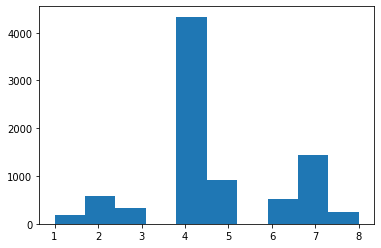

     views  likes  dislikes  comment  published  duration  category
0   440238   6153       218     1377       2053       449         2
1  1040132   8171       340     1047       1825       389         6
2    28534     31        11        1       1009      2274         4
3  1316715   2284       250      274        116       595         7
4  1893173   2519       225      116       1892       188         2
     views  likes  dislikes  comment  published  duration  category
0  1031602   8523       363     1095       2168       457         6
1     1707     56         2        6       2185       570         4
2     2023     25         0        2       2094       136         3
3   620860    777       161      153       2119       262         8
4      666      1         0        0       2091        31         4


In [ ]:
plt.hist(data_test["category"])
plt.show()


print(data_test.head())
print(data_train.head())
data_test.shape
data_test = scaler.fit_transform(data_test)

In [ ]:
joblib_SVR_model = joblib.load("random_forestregressor_youtubeadview.pkl")
Ypredict = joblib_SVR_model.predict(data_test)
Ypredict

array([790.69492264, 860.19792504,  91.84686757, ..., 613.60422195,
        12.33619996,  71.95934997])

In [ ]:
Ypredictions = pd.DataFrame(Ypredict, columns=['adview']).to_csv('predictions.csv')

In [ ]:
Ypredictions